# Identitying outliers using Mahalonobis distance

In this notebook we are going to identify outliers using Mahalanobis distance. In this code the p-value treashhold is considered 0.01 and the data distribution of chi2 with 2 degrees of freedom.

## Fist we need to read the data

In [35]:
import pandas as pd
from scipy import linalg
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:,[0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


## Define the Mahalanobis function

In [38]:
def Mahalanobis (x = None, data = None, cov = None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
        inv_covmat = linalg.inv(cov)
        left_term = np.dot(x_minus_mu, inv_covmat)
        mahal = np.dot(left_term, x_minus_mu.T)
        return mahal.diagonal()


In [78]:
df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = Mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x

,carat,depth,price,mahala
0,0.23,61.5,326,1.709860
1,0.21,59.8,326,3.540097
2,0.23,56.9,327,12.715021
3,0.29,62.4,334,1.454469
4,0.31,63.3,335,2.347239
...,...,...,...,...
495,0.71,62.7,2822,0.528080
496,0.71,61.3,2822,0.224117
497,0.70,60.2,2822,1.309547
498,0.70,60.7,2822,0.659238


## Identify outliers

In [66]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)
df_x.loc[df_x.p_value < 0.01]

,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.715021,1.733677e-03
91,0.86,55.1,2757,23.909643,6.428163e-06
97,0.96,66.3,2759,11.781773,2.764525e-03
172,1.17,60.2,2774,9.279459,9.660313e-03
204,0.98,67.9,2777,20.086616,4.347572e-05
221,0.70,57.2,2782,10.405659,5.500976e-03
227,0.84,55.1,2782,23.548379,7.700777e-06
255,1.05,65.8,2789,11.237146,3.629818e-03
284,1.00,58.2,2795,10.349019,5.658991e-03
298,1.01,67.4,2797,17.716144,1.422291e-04


## Plot the distribution for better understanding

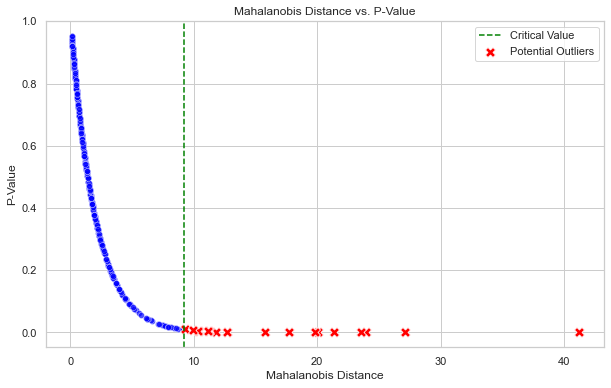

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plot Mahalanobis distances
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mahala', y='p_value', data=df_x, color='blue', alpha=0.7)

# Highlight potential outliers
outliers = df_x[df_x['p_value'] < 0.01]
sns.scatterplot(x='mahala', y='p_value', data=outliers, color='red', marker='X', s=100, label='Potential Outliers')

# Add critical value line
critical_value = chi2.ppf((1-0.01), df=2)
plt.axvline(x=critical_value, color='green', linestyle='--', label='Critical Value')

# Labels and title
plt.title('Mahalanobis Distance vs. P-Value')
plt.xlabel('Mahalanobis Distance')
plt.ylabel('P-Value')
plt.legend()
plt.show()


## Plot all data point and show outliers

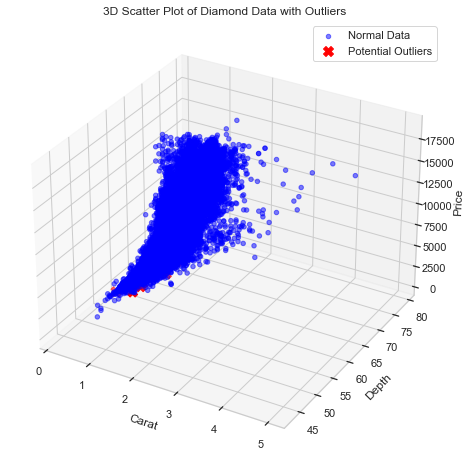

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all data points
ax.scatter(df['carat'], df['depth'], df['price'], c='blue', label='Normal Data', alpha=0.5)

# Highlight outliers
outliers = df_x[df_x['p_value'] < 0.01]
ax.scatter(outliers['carat'], outliers['depth'], outliers['price'], c='red', label='Potential Outliers', marker='X', s=100)

# Set labels
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Diamond Data with Outliers')

# Add a legend
ax.legend()

# Show the plot
plt.show()
